In [74]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [75]:
import pickle

with open('pkl/y.pkl', 'rb') as file:
    y = pickle.load(file)
with open('pkl/x.pkl', 'rb') as file:
    X = pickle.load(file)

In [76]:
from sklearn.model_selection import train_test_split

X_train , X_valid , y_train , y_valid = train_test_split(X , y , test_size=0.2 , random_state=42)

In [77]:
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
])



In [78]:
model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_16 (Normaliza  (None, 26)               53        
 tion)                                                           
                                                                 
 dense_63 (Dense)            (None, 50)                1350      
                                                                 
 dense_64 (Dense)            (None, 50)                2550      
                                                                 
 dense_65 (Dense)            (None, 50)                2550      
                                                                 
 dense_66 (Dense)            (None, 50)                2550      
                                                                 
 dense_67 (Dense)            (None, 50)                2550      
                                                     

In [79]:
optimizer = tf.keras.optimizers.Nadam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=50,
                    validation_data=(X_valid, y_valid))

Epoch 1/50
246/246 [==============================] - 4s 5ms/step - loss: 915.6364 - root_mean_squared_error: 30.2595 - val_loss: 450.5036 - val_root_mean_squared_error: 21.2251
Epoch 2/50
246/246 [==============================] - 1s 3ms/step - loss: 408.2520 - root_mean_squared_error: 20.2052 - val_loss: 390.8614 - val_root_mean_squared_error: 19.7702
Epoch 3/50
246/246 [==============================] - 1s 4ms/step - loss: 348.9819 - root_mean_squared_error: 18.6811 - val_loss: 331.0080 - val_root_mean_squared_error: 18.1936
Epoch 4/50
246/246 [==============================] - 1s 3ms/step - loss: 310.4097 - root_mean_squared_error: 17.6184 - val_loss: 304.0084 - val_root_mean_squared_error: 17.4358
Epoch 5/50
246/246 [==============================] - 1s 3ms/step - loss: 286.2202 - root_mean_squared_error: 16.9180 - val_loss: 304.4734 - val_root_mean_squared_error: 17.4492
Epoch 6/50
246/246 [==============================] - 1s 3ms/step - loss: 266.0429 - root_mean_squared_error: 

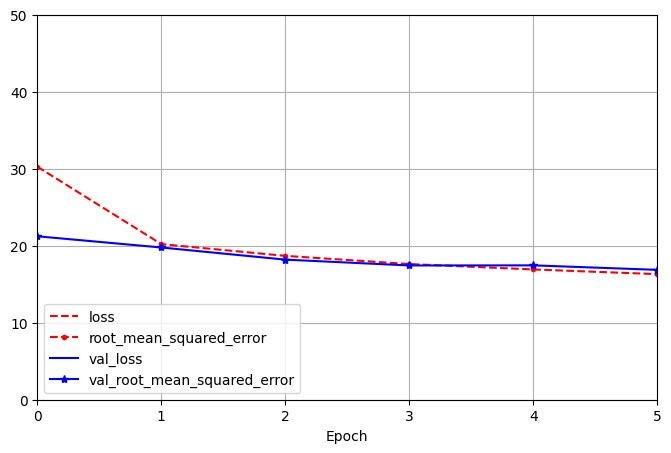

In [80]:
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 5], ylim=[0, 50], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left")
plt.show()

In [81]:
optimizer = tf.keras.optimizers.Adamax(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=50,
                    validation_data=(X_valid, y_valid))

Epoch 1/50
246/246 [==============================] - 3s 4ms/step - loss: 73.2437 - root_mean_squared_error: 8.5583 - val_loss: 189.8195 - val_root_mean_squared_error: 13.7775
Epoch 2/50
246/246 [==============================] - 1s 3ms/step - loss: 67.0613 - root_mean_squared_error: 8.1891 - val_loss: 188.9476 - val_root_mean_squared_error: 13.7458
Epoch 3/50
246/246 [==============================] - 1s 3ms/step - loss: 64.6631 - root_mean_squared_error: 8.0413 - val_loss: 191.8242 - val_root_mean_squared_error: 13.8501
Epoch 4/50
246/246 [==============================] - 1s 3ms/step - loss: 63.1890 - root_mean_squared_error: 7.9491 - val_loss: 188.7067 - val_root_mean_squared_error: 13.7371
Epoch 5/50
246/246 [==============================] - 1s 3ms/step - loss: 62.6151 - root_mean_squared_error: 7.9130 - val_loss: 188.3950 - val_root_mean_squared_error: 13.7257
Epoch 6/50
246/246 [==============================] - 1s 3ms/step - loss: 61.0081 - root_mean_squared_error: 7.8108 - va

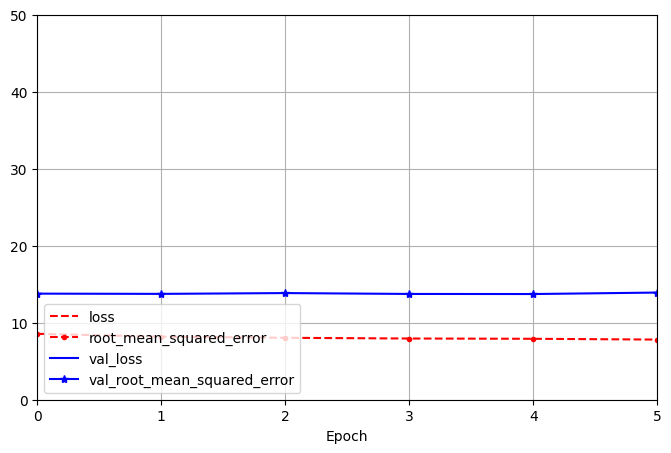

In [82]:
pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 5], ylim=[0, 50], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left")
plt.show()

In [83]:
X_train.shape[1:]

(26,)

In [84]:
tf.random.set_seed(42)
deep_model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(50, return_sequences=True, input_shape=[None, 1]),
    tf.keras.layers.SimpleRNN(50),
    tf.keras.layers.Dense(1)
])


In [85]:
model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_16 (Normaliza  (None, 26)               53        
 tion)                                                           
                                                                 
 dense_63 (Dense)            (None, 50)                1350      
                                                                 
 dense_64 (Dense)            (None, 50)                2550      
                                                                 
 dense_65 (Dense)            (None, 50)                2550      
                                                                 
 dense_66 (Dense)            (None, 50)                2550      
                                                                 
 dense_67 (Dense)            (None, 50)                2550      
                                                     

In [86]:
optimizer = tf.keras.optimizers.Nadam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
history = model.fit(X_train, y_train, epochs=50,
                    validation_data=(X_valid, y_valid))

Epoch 1/50
246/246 [==============================] - 5s 4ms/step - loss: 75.5496 - root_mean_squared_error: 8.6919 - val_loss: 217.5252 - val_root_mean_squared_error: 14.7487
Epoch 2/50
246/246 [==============================] - 1s 3ms/step - loss: 69.8300 - root_mean_squared_error: 8.3564 - val_loss: 191.2701 - val_root_mean_squared_error: 13.8300
Epoch 3/50
246/246 [==============================] - 1s 3ms/step - loss: 67.9691 - root_mean_squared_error: 8.2443 - val_loss: 196.6516 - val_root_mean_squared_error: 14.0233
Epoch 4/50
246/246 [==============================] - 1s 3ms/step - loss: 70.9102 - root_mean_squared_error: 8.4208 - val_loss: 199.7034 - val_root_mean_squared_error: 14.1316
Epoch 5/50
246/246 [==============================] - 1s 3ms/step - loss: 80.0961 - root_mean_squared_error: 8.9496 - val_loss: 199.3884 - val_root_mean_squared_error: 14.1205
Epoch 6/50
246/246 [==============================] - 1s 3ms/step - loss: 66.8249 - root_mean_squared_error: 8.1746 - va

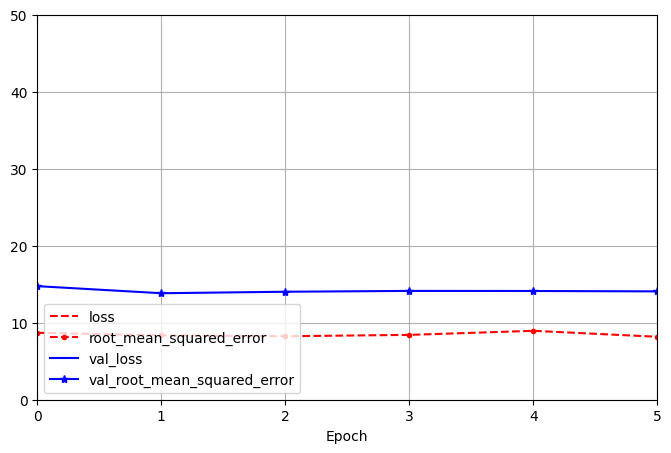

In [87]:
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 5], ylim=[0, 50], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left")
plt.show()

In [88]:
optimizer = tf.keras.optimizers.Adamax(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
history = model.fit(X_train, y_train, epochs=50,
                    validation_data=(X_valid, y_valid))

Epoch 1/50
246/246 [==============================] - 3s 4ms/step - loss: 36.8967 - root_mean_squared_error: 6.0743 - val_loss: 187.2713 - val_root_mean_squared_error: 13.6847
Epoch 2/50
246/246 [==============================] - 1s 3ms/step - loss: 30.8430 - root_mean_squared_error: 5.5536 - val_loss: 184.1180 - val_root_mean_squared_error: 13.5690
Epoch 3/50
246/246 [==============================] - 1s 3ms/step - loss: 29.5911 - root_mean_squared_error: 5.4398 - val_loss: 189.2712 - val_root_mean_squared_error: 13.7576
Epoch 4/50
246/246 [==============================] - 1s 3ms/step - loss: 29.2267 - root_mean_squared_error: 5.4062 - val_loss: 185.9727 - val_root_mean_squared_error: 13.6372
Epoch 5/50
246/246 [==============================] - 1s 2ms/step - loss: 28.6139 - root_mean_squared_error: 5.3492 - val_loss: 187.6243 - val_root_mean_squared_error: 13.6976
Epoch 6/50
246/246 [==============================] - 1s 3ms/step - loss: 27.9228 - root_mean_squared_error: 5.2842 - va

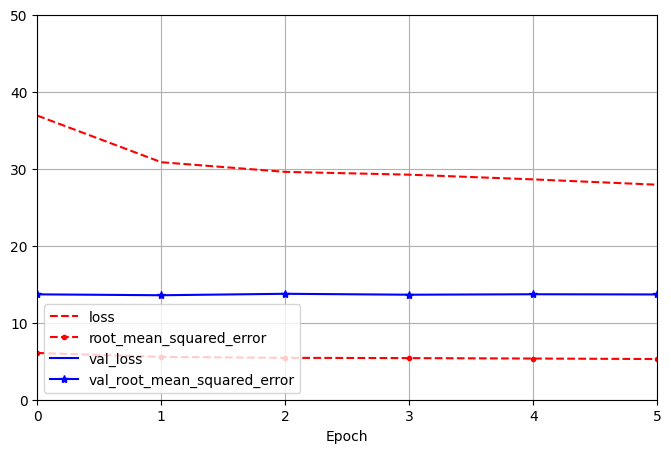

In [89]:
pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 5], ylim=[0, 50], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left")
plt.show()